In [1]:
# Compile dataframes from soft launch 1 & 2

# Import necessary libraries
import pandas as pd

# Define file paths for both Excel sheets
file1 = '~/Documents/Github/consciousness/code/Akanksha-consciousness_September-16-2024_10_40.xlsx'
file2 = '~/Documents/Github/consciousness/code/Akanksha-Softlaunch-Data-File.xlsx'

# Read in the first Excel file into a DataFrame
df1 = pd.read_excel(file1)

# Read in the second Excel file into a DataFrame (without skipping rows)
df2 = pd.read_excel(file2)

# Drop the first two rows from df1 & df2, assuming these are the unwanted header rows
df1_cleaned = df1.drop([0, 1]).reset_index(drop=True)
df2_cleaned = df2.drop([0, 1]).reset_index(drop=True)

# Combine the two DataFrames by appending rows from df2_cleaned to df1
# This will align matching columns and fill missing columns with NaN
combined_df = pd.concat([df1_cleaned, df2_cleaned], axis=0, ignore_index=True, sort=False)

# Save the combined DataFrame to a new Excel file in the same directory
output_file = '~/Documents/Github/consciousness/code/softlaunch_compiled.xlsx'
combined_df.to_excel(output_file, index=False)  # index=False prevents pandas from adding an extra index column

# Display the combined DataFrame to ensure it's properly merged
#print(combined_df.head())
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#    print(combined_df.columns.tolist())

   FF_total    FF_avg
0       118  3.025641
1       113  2.897436
2       143  3.666667
3       127  3.256410
4       115  2.948718


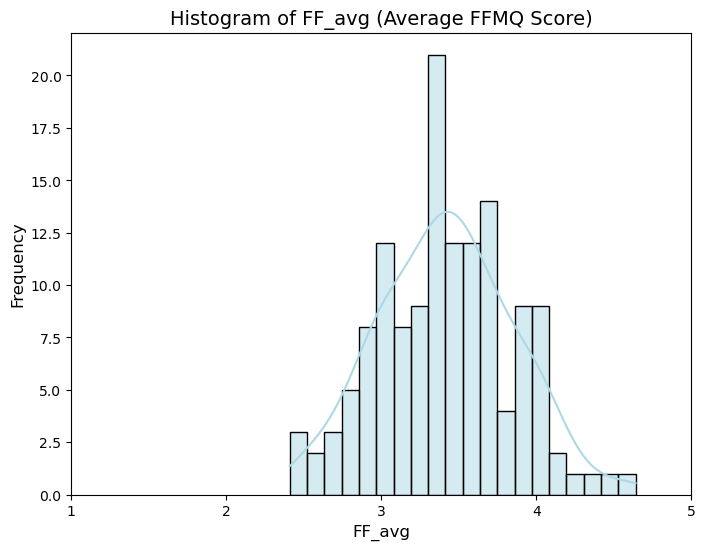

In [3]:
# Convert phenotypes: FFMQ
# Five Facet Mindfulness Questionnaire (FFMQ; Baer et al., 2008). 
# The FFMQ is a 39-item questionnaire that measures five component skills of mindfulness.  

# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the combined DataFrame (assuming you've already combined the data as in previous steps)
# combined_df = your_combined_dataframe

# Define the mapping of text responses to numeric values
response_mapping = {
    "Never or very rarely true": 1,
    "Rarely true": 2,
    "Sometimes true": 3,
    "Often true": 4,
    "Very often or always true": 5
}

# List of columns from the FFMQ survey (FF_1 to FF_39)
ffmq_columns = [f'FF_{i}' for i in range(1, 40)]

# Apply the mapping to convert text responses to numeric values for the FFMQ columns
combined_df[ffmq_columns] = combined_df[ffmq_columns].applymap(response_mapping.get)

# List of items to be reverse scored
reverse_scored_items = [12, 16, 22, 5, 8, 13, 18, 23, 28, 34, 38, 3, 10, 14, 17, 25, 30, 35, 39]

# Reverse scoring for the specified items
# Reverse scoring is done by subtracting the score from 6 (since we are working with scores 1 to 5)
for item in reverse_scored_items:
    combined_df[f'FF_{item}'] = 6 - combined_df[f'FF_{item}']

# Create a new column 'FF_total' which is the sum of all FFMQ items (FF_1 to FF_39)
combined_df['FF_total'] = combined_df[ffmq_columns].sum(axis=1)

# Create a new column 'FF_avg' which is the average of all FFMQ items (total score divided by the number of items, 39)
combined_df['FF_avg'] = combined_df['FF_total'] / 39

# Display the first few rows to check the results
print(combined_df[['FF_total', 'FF_avg']].head())

# Create a more aesthetically pleasing histogram with KDE
plt.figure(figsize=(8, 6))
sns.histplot(combined_df['FF_avg'], bins=20, kde=True, color='lightblue')

# Customize the appearance of the plot
plt.title('Histogram of FF_avg (Average FFMQ Score)', fontsize=14)
plt.xlabel('FF_avg', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Customize the x-axis to show all possible values (1 to 5, since responses are between 1 and 5)
plt.xticks([1, 2, 3, 4, 5])

# Remove grid lines
plt.grid(False)

# Show the plot
plt.show()

   EBDM_total  EBDM_avg
0        30.0       3.0
1        25.0       2.5
2        12.0       1.2
3        13.0       1.3
4        43.0       4.3


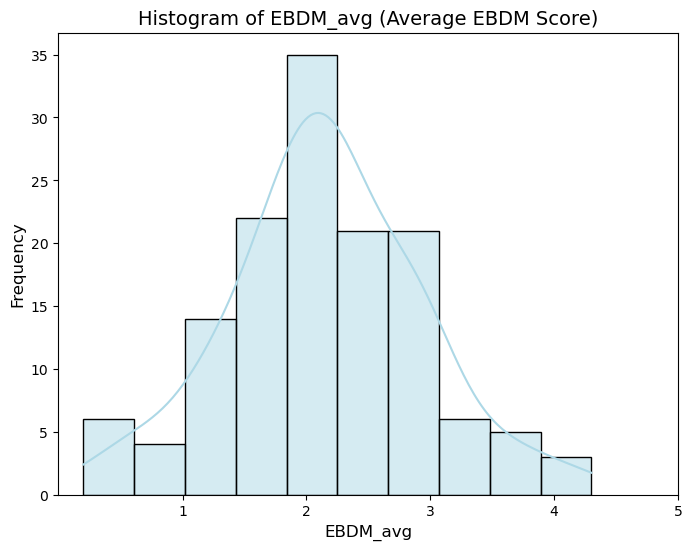

In [5]:
# Convert phenotypes: EBDM
# Emotion-Based Decision-Making Scale (EBDMS; Evans & Barchard, 2005). 
# The EBDMS is a 10-item scale that was designed to measure the tendency to make decisions based upon emotions. 

# Define the mapping of text responses to numeric values for the EBDM survey
ebdm_mapping = {
    "Very inaccurate": 1,
    "Moderately inaccurate": 2,
    "Neither accurate nor inaccurate": 3,
    "Moderately accurate": 4,
    "Very accurate": 5
}

# List of columns for the EBDM survey (excluding EBDM_7)
ebdm_columns = [f'EBDM_{i}' for i in range(1, 12) if i != 7]

# Apply the mapping to convert text responses to numeric values for the EBDM columns
combined_df[ebdm_columns] = combined_df[ebdm_columns].applymap(ebdm_mapping.get)

# List of items to be reverse scored (EBDM_6 through EBDM_11)
reverse_scored_ebdm = [6, 8, 9, 10, 11]

# Reverse scoring for the specified EBDM items
# Reverse scoring is done by subtracting the score from 6 (since the scale is 1 to 5)
for item in reverse_scored_ebdm:
    combined_df[f'EBDM_{item}'] = 6 - combined_df[f'EBDM_{item}']

# Create a new column 'EBDM_total' which is the sum of all EBDM items (EBDM_1 to EBDM_11, excluding EBDM_7)
combined_df['EBDM_total'] = combined_df[ebdm_columns].sum(axis=1)

# Create a new column 'EBDM_avg' which is the average of all EBDM items (total score divided by 10, since we have 10 items)
combined_df['EBDM_avg'] = combined_df['EBDM_total'] / 10

# Display the first few rows to check the results
print(combined_df[['EBDM_total', 'EBDM_avg']].head())

# Create a histogram for EBDM_avg with KDE and all possible x-axis values
plt.figure(figsize=(8, 6))
sns.histplot(combined_df['EBDM_avg'], bins=10, kde=True, color='lightblue')

# Customize the x-axis to show all possible values (1 to 5, since responses are between 1 and 5)
plt.xticks([1, 2, 3, 4, 5])

# Customize the appearance of the plot
plt.title('Histogram of EBDM_avg (Average EBDM Score)', fontsize=14)
plt.xlabel('EBDM_avg', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Remove grid lines
plt.grid(False)

# Show the plot
plt.show()

   Scam_Susceptibility_total  Scam_Susceptibility_avg
0                         23                      4.6
1                         23                      4.6
2                         11                      2.2
3                         33                      6.6
4                          9                      1.8


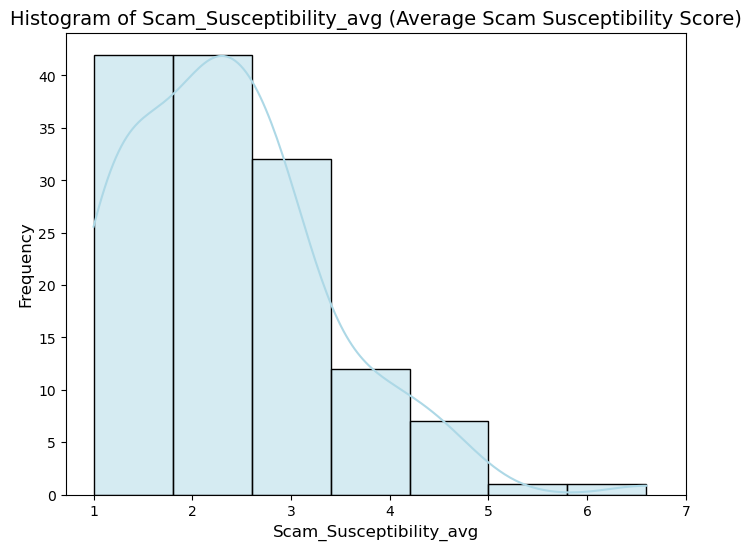

In [7]:
# Convert phenotypes: Scam Susceptibility
# Scam Susceptibility Scale (AARP, 1999; Financial Industry Regulatory Authority, 2013)
# This five question scale assesses scam susceptibility using questions from findings and official statements from AARP and the Financial Industry Regulatory Authority. 

# Define the mapping of text responses to numeric values for the Scam Susceptibility Scale
scam_mapping = {
    "Strongly agree": 1,
    "Agree": 2,
    "Slightly agree": 3,
    "Neither agree nor disagree": 4,
    "Slightly disagree": 5,
    "Disagree": 6,
    "Strongly disagree": 7
}

# List of columns for the Scam Susceptibility Scale (Scam Susceptibility_1 to Scam Susceptibility_5)
scam_columns = [f'Scam Susceptibility_{i}' for i in range(1, 6)]

# Apply the mapping to convert text responses to numeric values for the Scam Susceptibility columns
combined_df[scam_columns] = combined_df[scam_columns].applymap(scam_mapping.get)

# List of items to be reverse scored (Scam Susceptibility_1, Scam Susceptibility_2, Scam Susceptibility_5)
reverse_scored_scam = [1, 2, 5]

# Reverse scoring for the specified Scam Susceptibility items
# Reverse scoring is done by subtracting the score from 8 (since the scale is 1 to 7)
for item in reverse_scored_scam:
    combined_df[f'Scam Susceptibility_{item}'] = 8 - combined_df[f'Scam Susceptibility_{item}']

# Create a new column 'Scam_Susceptibility_total' which is the sum of all Scam Susceptibility items
combined_df['Scam_Susceptibility_total'] = combined_df[scam_columns].sum(axis=1)

# Create a new column 'Scam_Susceptibility_avg' which is the average of all Scam Susceptibility items (total score divided by 5, since we have 5 items)
combined_df['Scam_Susceptibility_avg'] = combined_df['Scam_Susceptibility_total'] / 5

# Display the first few rows to check the results
print(combined_df[['Scam_Susceptibility_total', 'Scam_Susceptibility_avg']].head())

# Create a histogram for Scam_Susceptibility_avg with KDE and all possible x-axis values
plt.figure(figsize=(8, 6))
sns.histplot(combined_df['Scam_Susceptibility_avg'], bins=7, kde=True, color='lightblue')

# Customize the x-axis to show all possible values (1 to 7, since responses are between 1 and 7)
plt.xticks([1, 2, 3, 4, 5, 6, 7])

# Customize the appearance of the plot
plt.title('Histogram of Scam_Susceptibility_avg (Average Scam Susceptibility Score)', fontsize=14)
plt.xlabel('Scam_Susceptibility_avg', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Remove grid lines
plt.grid(False)

# Show the plot
plt.show()

   SCD_total   SCD_avg
0         18  0.750000
1          2  0.083333
2          0  0.000000
3          1  0.041667
4         13  0.541667


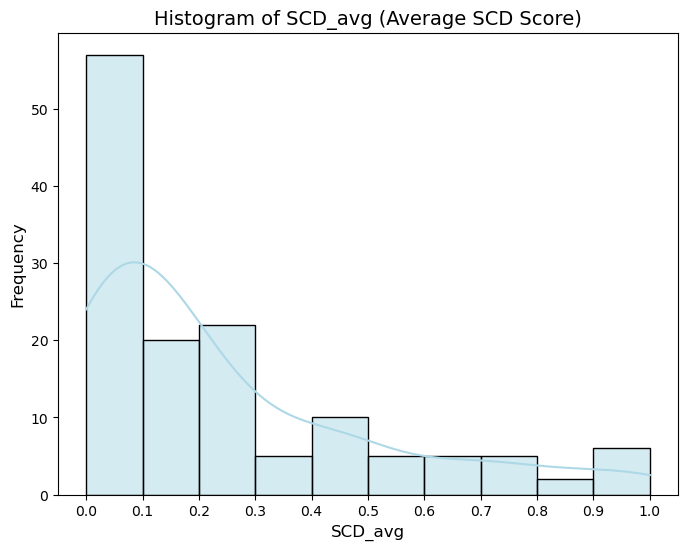

In [9]:
# Convert phenotypes: SCD-Q *** DOUBLE-CHECK THE SCORING ON THIS ONE ***
# Subjective Cognitive Decline Questionnaire (Rami et al., 2014)
# This twenty-four-question scale quantifies subjective cognitive decline. 

# Define the mapping of text responses to numeric values for the SCD Questionnaire
scd_mapping = {
    "Yes": 1,
    "No": 0
}

# List of columns for the SCD Questionnaire (SCD_1 to SCD_24)
scd_columns = [f'SCD_{i}' for i in range(1, 25)]

# Apply the mapping to convert text responses to numeric values for the SCD columns
combined_df[scd_columns] = combined_df[scd_columns].applymap(scd_mapping.get)

# Create a new column 'SCD_total' which is the sum of all SCD items
combined_df['SCD_total'] = combined_df[scd_columns].sum(axis=1)

# Create a new column 'SCD_avg' which is the average of all SCD items (total score divided by 24, since we have 24 items)
combined_df['SCD_avg'] = combined_df['SCD_total'] / 24

# Display the first few rows to check the results
print(combined_df[['SCD_total', 'SCD_avg']].head())

# Create a histogram for SCD_avg with KDE and all possible x-axis values
plt.figure(figsize=(8, 6))
sns.histplot(combined_df['SCD_avg'], bins=10, kde=True, color='lightblue')

# Customize the x-axis to show a wider range (0 to 1, since responses are between 0 and 1)
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

# Customize the appearance of the plot
plt.title('Histogram of SCD_avg (Average SCD Score)', fontsize=14)
plt.xlabel('SCD_avg', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Remove grid lines
plt.grid(False)

# Show the plot
plt.show()

   Confirmation_bias_total  Confirmation_bias_avg
0                     57.0               4.071429
1                     26.0               1.857143
2                     43.0               3.071429
3                     41.0               2.928571
4                     40.0               2.857143


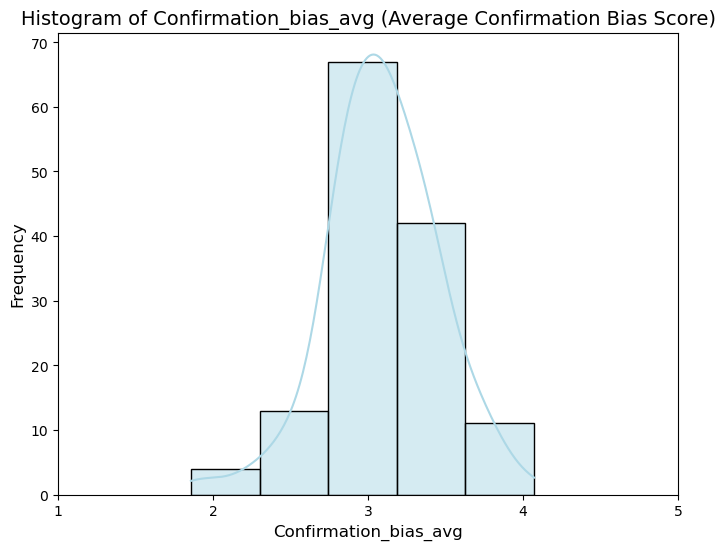

In [11]:
# Convert Phenotypes: CB
# Confirmation Bias Scale (Rassin, 2008)
# This fourteen-question scale measures an indivisuals susceptibility to confirmation bias.

# Define the mapping of text responses to numeric values for the Confirmation Bias Scale
confirmation_bias_mapping = {
    "Strongly Disagree": 1,
    "Disagree": 2,
    "Neutral": 3,
    "Agree": 4,
    "Strongly Agree": 5
}

# List of columns for the Confirmation Bias Scale (excluding Confirmation bias_12)
confirmation_bias_columns = [f'Confirmation bias_{i}' for i in range(1, 16) if i != 12]

# Apply the mapping to convert text responses to numeric values for the Confirmation Bias columns
combined_df[confirmation_bias_columns] = combined_df[confirmation_bias_columns].applymap(confirmation_bias_mapping.get)

# List of items to be reverse scored (Confirmation bias_11, Confirmation bias_14)
reverse_scored_confirmation_bias = [11, 14]

# Reverse scoring for the specified Confirmation Bias items
# Reverse scoring is done by subtracting the score from 6 (since the scale is 1 to 5)
for item in reverse_scored_confirmation_bias:
    combined_df[f'Confirmation bias_{item}'] = 6 - combined_df[f'Confirmation bias_{item}']

# Create a new column 'Confirmation_bias_total' which is the sum of all Confirmation Bias items
combined_df['Confirmation_bias_total'] = combined_df[confirmation_bias_columns].sum(axis=1)

# Create a new column 'Confirmation_bias_avg' which is the average of all Confirmation Bias items (total score divided by 14, since we have 14 items)
combined_df['Confirmation_bias_avg'] = combined_df['Confirmation_bias_total'] / 14

# Display the first few rows to check the results
print(combined_df[['Confirmation_bias_total', 'Confirmation_bias_avg']].head())

# Create a histogram for Confirmation_bias_avg with KDE and all possible x-axis values
plt.figure(figsize=(8, 6))
sns.histplot(combined_df['Confirmation_bias_avg'], bins=5, kde=True, color='lightblue')

# Customize the x-axis to show all possible values (1 to 5, since responses are between 1 and 5)
plt.xticks([1, 2, 3, 4, 5])

# Customize the appearance of the plot
plt.title('Histogram of Confirmation_bias_avg (Average Confirmation Bias Score)', fontsize=14)
plt.xlabel('Confirmation_bias_avg', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Remove grid lines
plt.grid(False)

# Show the plot
plt.show()

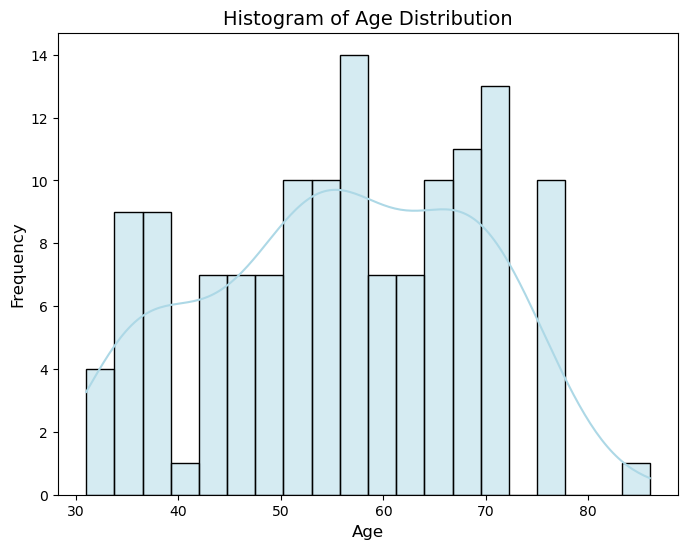

In [13]:
# Create a histogram for the 'Age' column with KDE
plt.figure(figsize=(8, 6))
sns.histplot(combined_df['Age'], bins=20, kde=True, color='lightblue')

# Customize the appearance of the plot
plt.title('Histogram of Age Distribution', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Remove grid lines
plt.grid(False)

# Show the plot
plt.show()

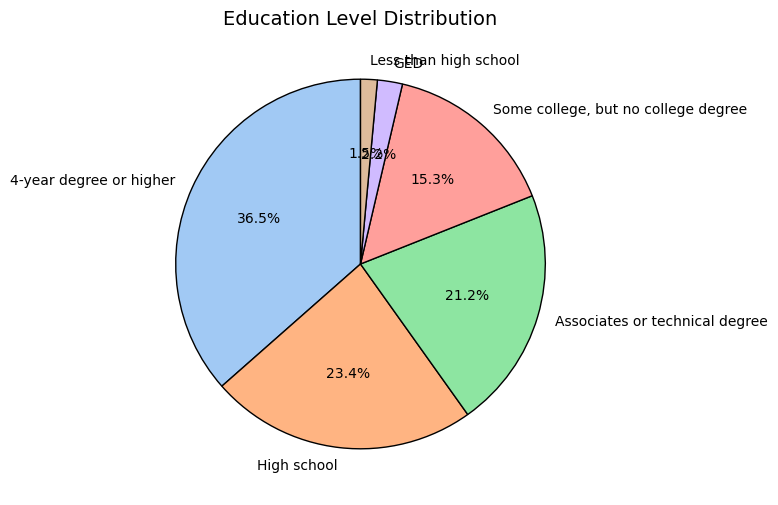

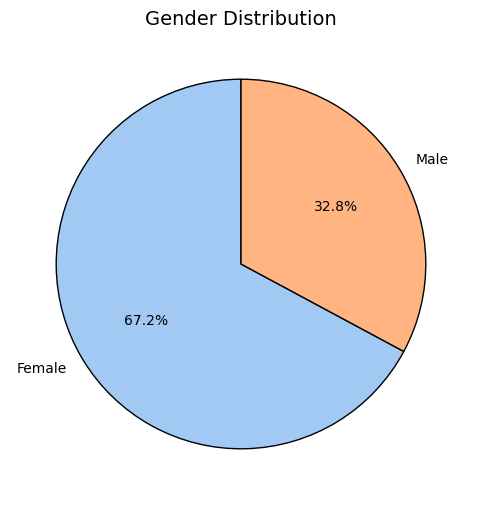

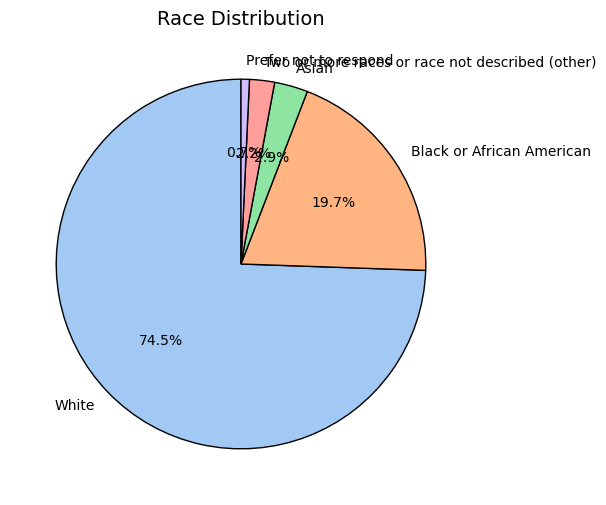

In [15]:
# Define a function to create a pie chart with custom aesthetics
def create_pie_chart(column, title):
    plt.figure(figsize=(6, 6))
    
    # Calculate the percentage of each category in the column
    combined_df[column].value_counts().plot.pie(
        autopct='%1.1f%%', 
        startangle=90, 
        colors=sns.color_palette('pastel'),  # Using pastel colors for a soft look
        wedgeprops={'edgecolor': 'black'}
    )
    
    # Customize the appearance
    plt.title(f'{title}', fontsize=14)
    plt.ylabel('')  # Hide the y-label for a cleaner look
    
    # Show the plot
    plt.show()

# Create pie charts for 'Education', 'Gender', and 'Race'
create_pie_chart('Education', 'Education Level Distribution')
create_pie_chart('Gender', 'Gender Distribution')
create_pie_chart('Race', 'Race Distribution')

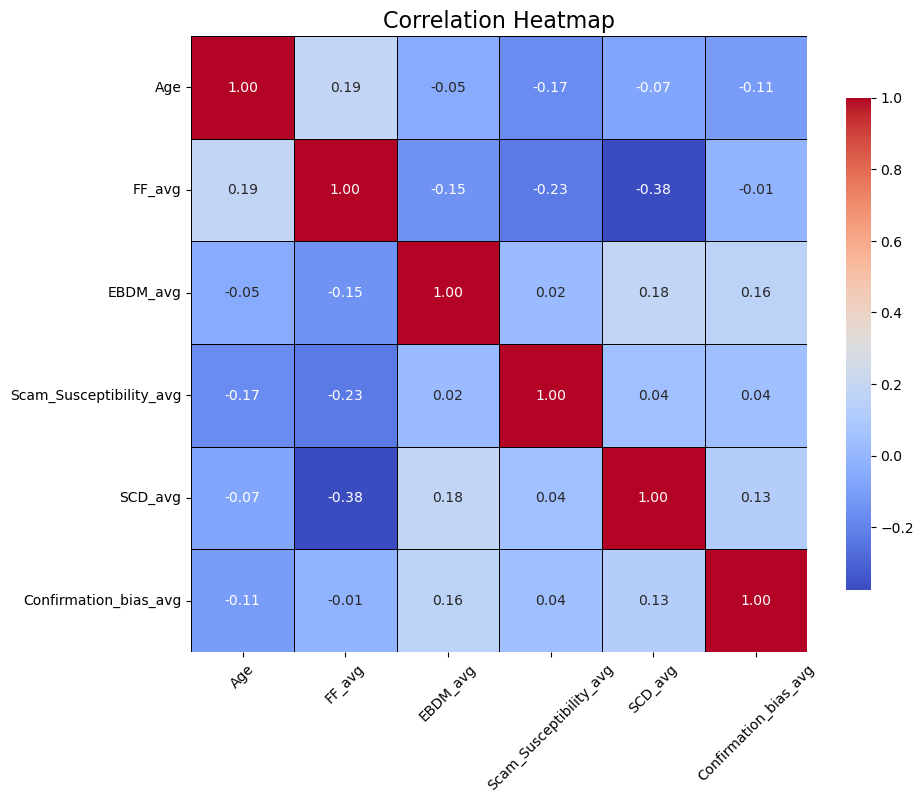

In [17]:
# Correlation heatmap for the relevant columns
correlation_data = combined_df[['Age', 'FF_avg', 'EBDM_avg', 'Scam_Susceptibility_avg', 'SCD_avg', 'Confirmation_bias_avg']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(
    correlation_matrix,
    annot=True,          # Annotate cells with the correlation coefficients
    cmap='coolwarm',     # Color palette
    square=True,         # Make cells square-shaped
    cbar_kws={"shrink": .8},  # Adjust the color bar size
    fmt=".2f",          # Format the annotations to two decimal places
    linewidths=0.5,     # Lines between cells
    linecolor='black'    # Color of the lines between cells
)

# Customize the appearance
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)   # Keep y-axis labels horizontal

# Show the plot
plt.show()

FF_avg                     0
Age                        0
Scam_Susceptibility_avg    0
dtype: int64
                                   OLS Regression Results                                   
Dep. Variable:     Scam_Susceptibility_avg   R-squared (uncentered):                   0.809
Model:                                 OLS   Adj. R-squared (uncentered):              0.808
Method:                      Least Squares   F-statistic:                              577.5
Date:                     Sat, 28 Sep 2024   Prob (F-statistic):                    8.46e-51
Time:                             01:49:29   Log-Likelihood:                         -209.96
No. Observations:                      137   AIC:                                      421.9
Df Residuals:                          136   BIC:                                      424.8
Df Model:                                1                                                  
Covariance Type:                 nonrobust                     

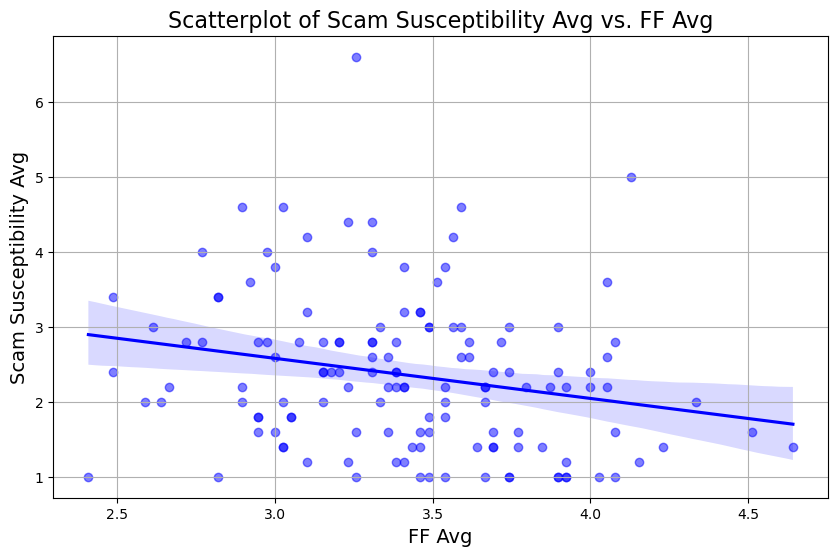

                                   OLS Regression Results                                   
Dep. Variable:     Scam_Susceptibility_avg   R-squared (uncentered):                   0.849
Model:                                 OLS   Adj. R-squared (uncentered):              0.846
Method:                      Least Squares   F-statistic:                              251.3
Date:                     Sat, 28 Sep 2024   Prob (F-statistic):                    8.10e-55
Time:                             01:49:29   Log-Likelihood:                         -193.97
No. Observations:                      137   AIC:                                      393.9
Df Residuals:                          134   BIC:                                      402.7
Df Model:                                3                                                  
Covariance Type:                 nonrobust                                                  
                         coef    std err          t      P>|t|      [0

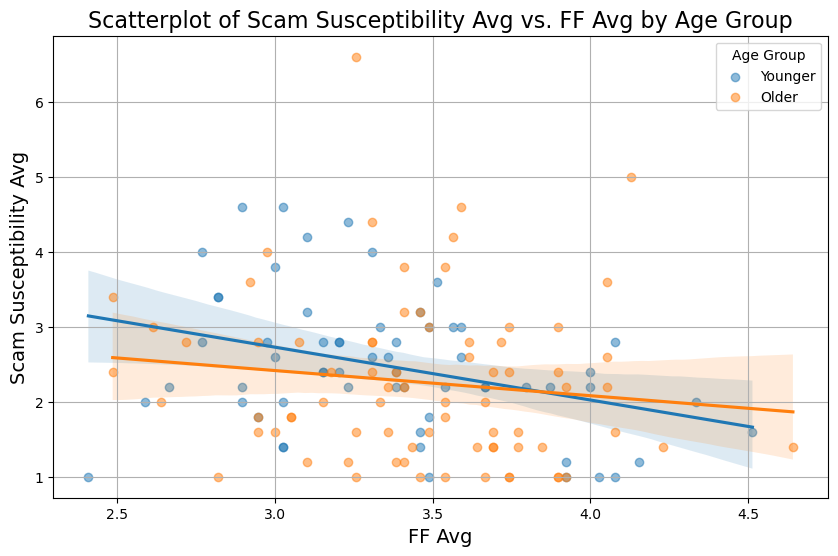

In [21]:
# Test Q1: Scam Susceptibility ~ FFMQ * Age
import statsmodels.api as sm
import seaborn as sns
import numpy as np

# Check for missing values in relevant columns
print(combined_df[['FF_avg', 'Age', 'Scam_Susceptibility_avg']].isnull().sum())

# Drop rows with missing values in these columns (if any)
combined_df = combined_df.dropna(subset=['FF_avg', 'Age', 'Scam_Susceptibility_avg'])

# Ensure the data types are numeric
combined_df['FF_avg'] = pd.to_numeric(combined_df['FF_avg'], errors='coerce')
combined_df['Age'] = pd.to_numeric(combined_df['Age'], errors='coerce')
combined_df['Scam_Susceptibility_avg'] = pd.to_numeric(combined_df['Scam_Susceptibility_avg'], errors='coerce')

# Drop any rows that may have been created as NaN due to coercion
combined_df = combined_df.dropna(subset=['FF_avg', 'Age', 'Scam_Susceptibility_avg'])

# Prepare the data for regression
X = combined_df['FF_avg']  # Independent variables
#X = sm.add_constant(X)  # Add a constant term for the intercept
y = combined_df['Scam_Susceptibility_avg']  # Dependent variable

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())

# Create scatterplot with Scam_susceptibility_avg vs. FF_avg with trend line and confidence interval
plt.figure(figsize=(10, 6))
sns.regplot(x='FF_avg', y='Scam_Susceptibility_avg', data=combined_df, 
            scatter_kws={'color': 'blue', 'alpha': 0.5}, 
            line_kws={'color': 'blue'}, 
            ci=95)  # 95% confidence interval

plt.title('Scatterplot of Scam Susceptibility Avg vs. FF Avg', fontsize=16)
plt.xlabel('FF Avg', fontsize=14)
plt.ylabel('Scam Susceptibility Avg', fontsize=14)
plt.grid(True)
plt.show()

# Create a new column to categorize participants into two groups based on age
combined_df['Age_Group'] = np.where(combined_df['Age'] >= 55, 'Older', 'Younger')

# Prepare the independent variables for the regression model, including the interaction term
combined_df['Age'] = combined_df['Age']  # Ensure Age is numeric
combined_df['FFMQ_avg'] = combined_df['FF_avg']  # Ensure FFMQ_avg is numeric

# Create interaction term
combined_df['Age_FF_Interaction'] = combined_df['Age'] * combined_df['FF_avg']

# Prepare the model data
X = combined_df[['FF_avg', 'Age', 'Age_FF_Interaction']]  # Independent variables
y = combined_df['Scam_Susceptibility_avg']  # Dependent variable

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the regression results, including the interaction term
print(model.summary())

# Create scatterplot with different colors for age groups with trend lines and confidence intervals
plt.figure(figsize=(10, 6))
for age_group in combined_df['Age_Group'].unique():
    subset = combined_df[combined_df['Age_Group'] == age_group]
    sns.regplot(x='FF_avg', y='Scam_Susceptibility_avg', data=subset, 
                label=age_group, 
                scatter_kws={'alpha': 0.5}, 
                line_kws={},  # No label for trend line
                ci=95)  # 95% confidence interval

plt.title('Scatterplot of Scam Susceptibility Avg vs. FF Avg by Age Group', fontsize=16)
plt.xlabel('FF Avg', fontsize=14)
plt.ylabel('Scam Susceptibility Avg', fontsize=14)
plt.legend(title='Age Group')
plt.grid(True)
plt.show()

EBDM_avg    0
dtype: int64
                            OLS Regression Results                            
Dep. Variable:               EBDM_avg   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.559
Date:                Sat, 28 Sep 2024   Prob (F-statistic):              0.214
Time:                        01:50:42   Log-Likelihood:                -159.57
No. Observations:                 137   AIC:                             325.1
Df Residuals:                     134   BIC:                             333.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1344    

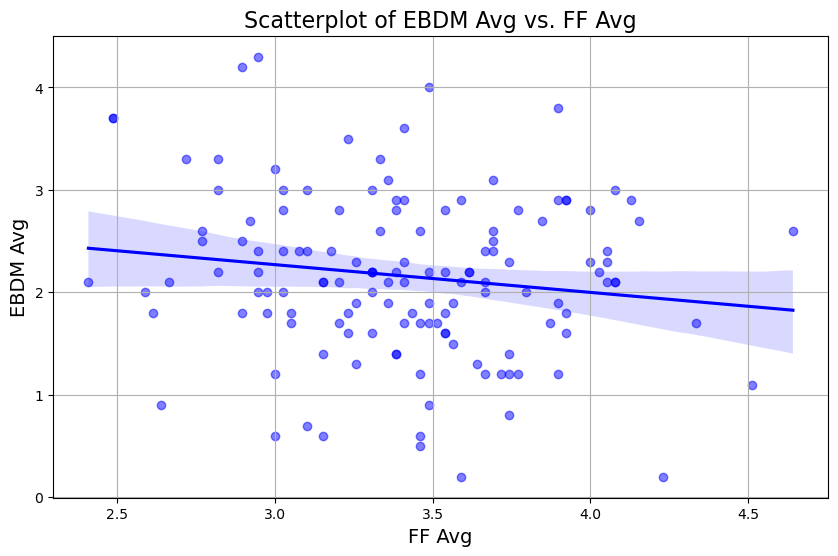

                                 OLS Regression Results                                
Dep. Variable:               EBDM_avg   R-squared (uncentered):                   0.884
Model:                            OLS   Adj. R-squared (uncentered):              0.881
Method:                 Least Squares   F-statistic:                              339.7
Date:                Sat, 28 Sep 2024   Prob (F-statistic):                    2.06e-62
Time:                        01:50:42   Log-Likelihood:                         -160.82
No. Observations:                 137   AIC:                                      327.6
Df Residuals:                     134   BIC:                                      336.4
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

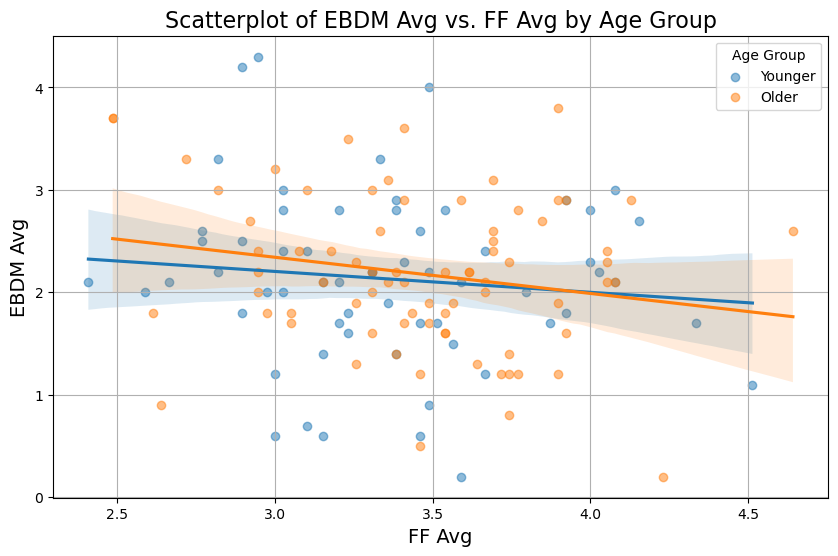

In [23]:
# Test Q2(A): EBDM ~ Age * FFMQ

# Check for missing values in relevant columns
print(combined_df[['EBDM_avg']].isnull().sum())

# Drop rows with missing values in these columns (if any)
combined_df = combined_df.dropna(subset=['EBDM_avg'])

# Ensure the data types are numeric
combined_df['EBDM_avg'] = pd.to_numeric(combined_df['EBDM_avg'], errors='coerce')

# Drop any rows that may have been created as NaN due to coercion
combined_df = combined_df.dropna(subset=['EBDM_avg'])

# Prepare the data for regression
X = combined_df[['FF_avg', 'Age']]  # Independent variables
X = sm.add_constant(X)  # Add a constant term for the intercept
y = combined_df['EBDM_avg']  # Dependent variable

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())

# Create scatterplot with EBDM_avg vs. FF_avg with trend line and confidence interval
plt.figure(figsize=(10, 6))
sns.regplot(x='FF_avg', y='EBDM_avg', data=combined_df, 
            scatter_kws={'color': 'blue', 'alpha': 0.5}, 
            line_kws={'color': 'blue'}, 
            ci=95)  # 95% confidence interval

plt.title('Scatterplot of EBDM Avg vs. FF Avg', fontsize=16)
plt.xlabel('FF Avg', fontsize=14)
plt.ylabel('EBDM Avg', fontsize=14)
plt.grid(True)
plt.show()

# Create a new column to categorize participants into two groups based on age
combined_df['Age_Group'] = np.where(combined_df['Age'] >= 55, 'Older', 'Younger')

# Prepare the model data
X = combined_df[['FF_avg', 'Age', 'Age_FF_Interaction']]  # Independent variables
y = combined_df['EBDM_avg']  # Dependent variable

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())

# Create scatterplot with different colors for age groups with trend lines and confidence intervals
plt.figure(figsize=(10, 6))
for age_group in combined_df['Age_Group'].unique():
    subset = combined_df[combined_df['Age_Group'] == age_group]
    sns.regplot(x='FF_avg', y='EBDM_avg', data=subset, 
                label=age_group, 
                scatter_kws={'alpha': 0.5}, 
                line_kws={},  # No label for trend line
                ci=95)  # 95% confidence interval

plt.title('Scatterplot of EBDM Avg vs. FF Avg by Age Group', fontsize=16)
plt.xlabel('FF Avg', fontsize=14)
plt.ylabel('EBDM Avg', fontsize=14)
plt.legend(title='Age Group')
plt.grid(True)
plt.show()

                            OLS Regression Results                            
Dep. Variable:                SCD_avg   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     11.09
Date:                Sat, 28 Sep 2024   Prob (F-statistic):           3.50e-05
Time:                        01:51:03   Log-Likelihood:               -0.72059
No. Observations:                 137   AIC:                             7.441
Df Residuals:                     134   BIC:                             16.20
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0293      0.178      5.770      0.0

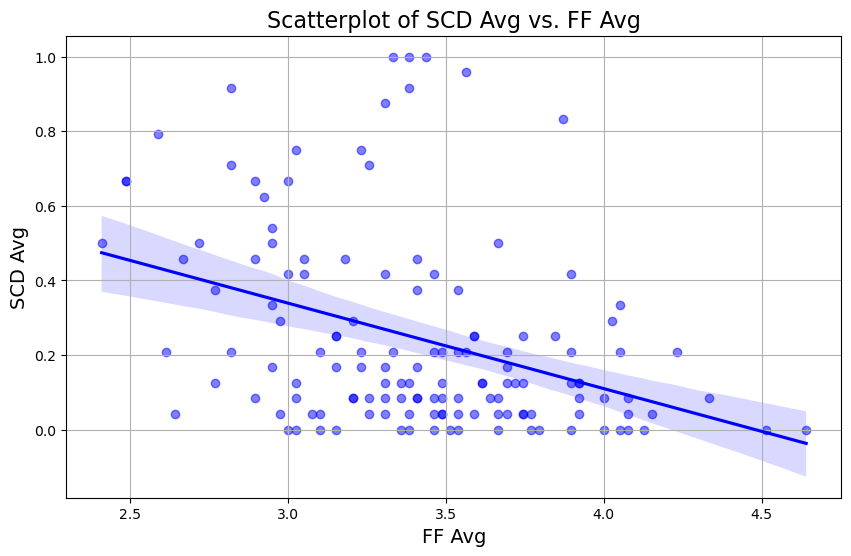

                            OLS Regression Results                            
Dep. Variable:                SCD_avg   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     7.365
Date:                Sat, 28 Sep 2024   Prob (F-statistic):           0.000133
Time:                        01:51:03   Log-Likelihood:               -0.68289
No. Observations:                 137   AIC:                             9.366
Df Residuals:                     133   BIC:                             21.05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.2354      0

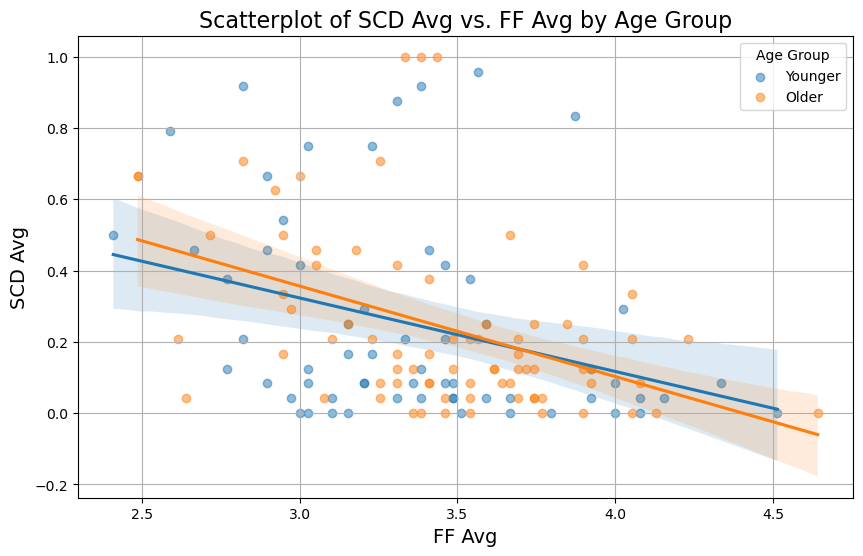

In [25]:
# Test Q2(B): SCD ~ Age * FFMQ

# Ensure the data types are numeric
combined_df['FF_avg'] = pd.to_numeric(combined_df['FF_avg'], errors='coerce')
combined_df['Age'] = pd.to_numeric(combined_df['Age'], errors='coerce')
combined_df['SCD_avg'] = pd.to_numeric(combined_df['SCD_avg'], errors='coerce')

# Drop any rows that may have been created as NaN due to coercion
combined_df = combined_df.dropna(subset=['FF_avg', 'Age', 'SCD_avg'])

# Prepare the data for regression
X = combined_df[['FF_avg', 'Age']]  # Independent variables
X = sm.add_constant(X)  # Add a constant term for the intercept
y = combined_df['SCD_avg']  # Dependent variable

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())

# Create scatterplot with EBDM_avg vs. FF_avg with trend line and confidence interval
plt.figure(figsize=(10, 6))
sns.regplot(x='FF_avg', y='SCD_avg', data=combined_df, 
            scatter_kws={'color': 'blue', 'alpha': 0.5}, 
            line_kws={'color': 'blue'}, 
            ci=95)  # 95% confidence interval

plt.title('Scatterplot of SCD Avg vs. FF Avg', fontsize=16)
plt.xlabel('FF Avg', fontsize=14)
plt.ylabel('SCD Avg', fontsize=14)
plt.grid(True)
plt.show()

# Prepare the model data
X = combined_df[['FF_avg', 'Age', 'Age_FF_Interaction']]  # Independent variables
X = sm.add_constant(X)  # Add a constant term for the intercept
y = combined_df['SCD_avg']  # Dependent variable

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())

# Create scatterplot with different colors for age groups with trend lines and confidence intervals
plt.figure(figsize=(10, 6))
for age_group in combined_df['Age_Group'].unique():
    subset = combined_df[combined_df['Age_Group'] == age_group]
    sns.regplot(x='FF_avg', y='SCD_avg', data=subset, 
                label=age_group, 
                scatter_kws={'alpha': 0.5}, 
                line_kws={},  # No label for trend line
                ci=95)  # 95% confidence interval

plt.title('Scatterplot of SCD Avg vs. FF Avg by Age Group', fontsize=16)
plt.xlabel('FF Avg', fontsize=14)
plt.ylabel('SCD Avg', fontsize=14)
plt.legend(title='Age Group')
plt.grid(True)
plt.show()

Confirmation_bias_avg    0
dtype: int64
                            OLS Regression Results                            
Dep. Variable:                SCD_avg   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     2.235
Date:                Sat, 28 Sep 2024   Prob (F-statistic):              0.137
Time:                        01:51:07   Log-Likelihood:                -10.085
No. Observations:                 137   AIC:                             24.17
Df Residuals:                     135   BIC:                             30.01
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

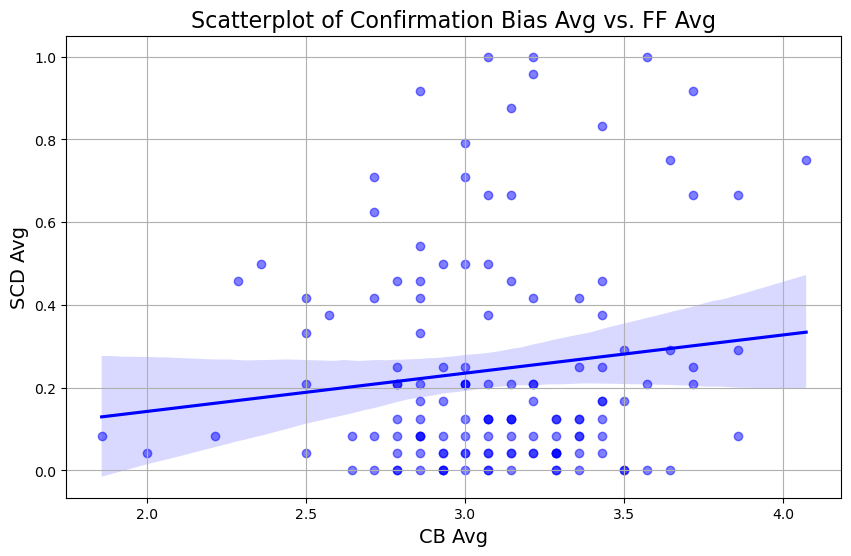

In [27]:
# Test Exploratory: Confirmation Bias & Age, SCD, FFMQ

# Check for missing values in relevant columns
print(combined_df[['Confirmation_bias_avg']].isnull().sum())

# Drop rows with missing values in these columns (if any)
combined_df = combined_df.dropna(subset=['Confirmation_bias_avg'])

# Ensure the data types are numeric
combined_df['Confirmation_bias_avg'] = pd.to_numeric(combined_df['Confirmation_bias_avg'], errors='coerce')

# Drop any rows that may have been created as NaN due to coercion
combined_df = combined_df.dropna(subset=['Confirmation_bias_avg'])

# Prepare the data for regression
X = combined_df[['Confirmation_bias_avg']]  # Independent variables
X = sm.add_constant(X)  # Add a constant term for the intercept
y = combined_df['SCD_avg']  # Dependent variable

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())

# Create scatterplot with SCD_avg vs. Confirmation_bias_avg with trend line and confidence interval
plt.figure(figsize=(10, 6))
sns.regplot(x='Confirmation_bias_avg', y='SCD_avg', data=combined_df, 
            scatter_kws={'color': 'blue', 'alpha': 0.5}, 
            line_kws={'color': 'blue'}, 
            ci=95)  # 95% confidence interval

plt.title('Scatterplot of Confirmation Bias Avg vs. FF Avg', fontsize=16)
plt.xlabel('CB Avg', fontsize=14)
plt.ylabel('SCD Avg', fontsize=14)
plt.grid(True)
plt.show()